<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# LAB ASSIGNMENT ACTIVITY 3

# Question 1

Using PCA method to transform the iris data into 3 dimensional and visualize PCA with `px.scatter_3d`.

Define the transformed data as `Xtransform_PCA`. 

In [1]:
import plotly.express as px
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()

df = px.data.iris()
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [2]:
## Answer 1

## Write your answer here
pca=PCA(n_components=3)
Xtransform_PCA=pca.fit_transform(X)


    
## Do not change the following:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    Xtransform_PCA, x=0, y=1, z=2, color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [3]:
Xtransform_PCA.shape

(150, 3)

# Question 2

Use SVD to perform the below PCA example. Perform SVD to the matrix A and tranform it to the matrix B.

(Hint: https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca,
https://math.stackexchange.com/questions/3869/what-is-the-intuitive-relationship-between-svd-and-pca)

Example:


In [4]:
import numpy as np
from sklearn.decomposition import PCA
# define a matrix
A = np.array([[1, 2], [3, 4], [5, 6]])
print('A= ', A)
# create the PCA instance and fit on data
pca = PCA(n_components=2).fit(A)
# transform data
B = pca.transform(A)
print('B= ', B)

A=  [[1 2]
 [3 4]
 [5 6]]
B=  [[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]


In [5]:
## answer 2
U, s, VT = np.linalg.svd(A)
k=2
B=np.dot(A,VT.T[:,:k])
print(B)

[[-2.18941839  0.45436451]
 [-4.99846626  0.12383458]
 [-7.80751414 -0.20669536]]


Notice that the resultant matrix may not be exactly the same. This is because SVD is unique only to some extent. 
Let $[y_1,\cdots,y_m]\in\mathbb{R}^{n\times m}$ be the data matrix and we would like to find $l$ principal components using SVD.
This can be seen as in the optimization scheme:
$$\min_{\phi_1,\cdots,\phi_l} \sum^m_{k=1}\sum^l_{j=1}\left\|{\bf y}_k - \left<{\bf y}_k,{\bf \phi}_j\right>{\bf \phi}_j\right\|^2$$
$$s.t. \left<\phi_i,\phi_j\right>=\delta_{i j}, i,j=1,\cdots,l$$

It can be easily seen that the transformation $\phi \mapsto a\phi$ would still solve the minimization program if $\phi$ is a solution and $|a|=1$. In our example, since we only consider real numbers, the sign in the resultant matrix would be changeable.

In fact, the set of principal components with respect each spectral value has the freedom of under going unitary transformation. 


Another issue relates to using SVD on the centralized data matrix $\bar{A}$ or the covariance matrix $X$.

In [6]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A=A- np.mean(A, axis=0)
X=A.T.dot(A)/(A.shape[0]-1)

U, s, VT1 = np.linalg.svd(A)
print(VT1)
U, s, VT2 = np.linalg.svd(X)
print(VT2)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


The difference lies in the principal components. But, they still are equivalent, in the sense that $VT1 = P \cdot VT2$ for some unitary matrix $P$.

In our case, $$P=\begin{bmatrix}-1&0\\0&1\end{bmatrix}.$$

# Question 3

Enter:

In [56]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv('face_data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [60]:
def plot_faces(pixels):
    fig, axes = plt.subplots(5, 5, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

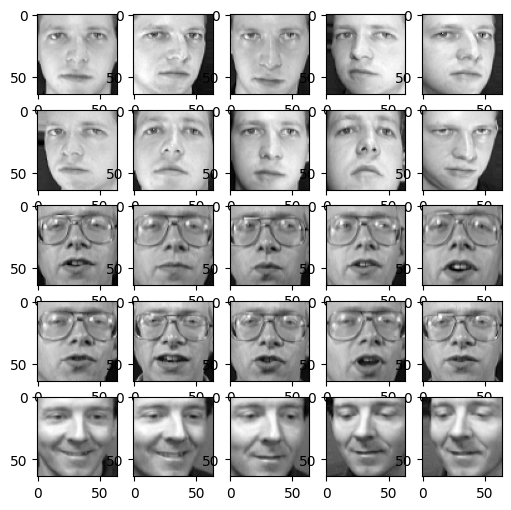

In [61]:
X = df.drop('target', axis=1)
y = df['target']

plot_faces(X)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Use SVD to perform the below PCA example.

In [63]:
pca = PCA(n_components=105).fit(X_train)
X_train_pca = pca.transform(X_train)

In [64]:
classifier = SVC().fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test)
predictions = classifier.predict(X_test_pca)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         5
          18       1.00    

Calculate `X_train_svd` by SVD and put it into SVC method to see it’s performance.

(Hint: Using `scipy.sparse.linalg.svds` to compute SVD since it is much faster than `np.linalg.svd` and `scipy.sparse.linalg.svds` can choose the number of singular values and vectors to compute.)

In [65]:
## answer 3
from scipy.sparse.linalg import svds

## Write your code here
Xm_train=X_train-np.mean(X_train, axis=0)
# Xm_train=Xm_train.T.dot(Xm_train)/(Xm_train.shape[0]-1)
U, s, VT = svds(Xm_train.values,k=105)
X_train_svd=np.dot(Xm_train,VT.T)



## Do not change the following:
classifier = SVC().fit(X_train_svd, y_train)
Xm_test=X_test-np.mean(X_train, axis=0)
X_test_svd = np.dot(Xm_test,VT.T)
predictions = classifier.predict(X_test_svd)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         5
          18       1.00    

## Question 4


In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(10)
np.random.seed(10)

def gen_ball(center,radius,num_per_group):    
    result=np.zeros((num_per_group,2))
    for i in range(num_per_group):
        theta= (2*random.random()-1)*np.pi
        r = radius*random.random()
        result[i,0]= center[0]+r*np.cos(theta)
        result[i,1]=center[1]+r*np.sin(theta)
    return np.array(result)


centers=np.array([[1,-3],[21,1],[17,21],[18,-9],[7,-11],
                 [7,0],[14,10],[-1,15],[6,13],[-15,5]])
radii=np.array([3,2,5,7,3,2,5,7,3,3])
nums=np.array([40,60,70,90,10,100,80,80,40,100])

### Q4a
The function `gen_ball(center,radius,num_per_group)` generates a dataset of size=`num_per_group`, with each datapoint randomly lying in a two-dimensional circle with center = `center` and radius = `radius`. 

The output of the function is a np.array of size (`num_per_group,2`).

With this function, we can create several scattered balls.

Which set of the two black lines below better represent the principal components of the data? Briefly explain.
<center>
<img src="Q4a.png">
</center>

## answer 4a

Set A. Since the horizontal lines aligns with the direction that the datapoints are greatly spread.


### Q4b

We now want to create 10 groups of scattered dots on $\mathbb{R}^2$ using `gen_ball`. Their respective centers, radius and numbers of points are stored in `centers`, `radii` and `nums`.

Perform PCA (with `n_components_ = 2`) on the whole dataset.

Plot all the datapoints on the graph with a different color for each group using `plt.scatter`. 

Add two black lines representing the direction of the principal components on the same plot.

Mean values:  [6.88103234 5.25640706]
Standard deviation:  [11.70867551  9.20450324]
Minimum values:  [-17.52778411 -14.53896313]
Maximum values:  [24.62711094 25.60397587]
Shape of data:  (670, 2)
Data:  [[  0.83877     -2.68068719]
 [  0.7949563   -1.66859886]
 [  3.04119328  -4.96026565]
 ...
 [-14.8663039    4.5622    ]
 [-15.03997623   4.99495692]
 [-14.73787138   4.08331313]]


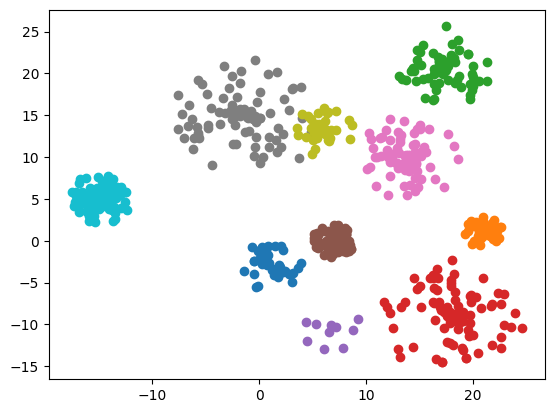

In [68]:
## answer 4b

from sklearn.decomposition import PCA

centers=np.array([[1,-3],[21,1],[17,21],[18,-9],[7,-11],
                 [7,0],[14,10],[-1,15],[6,13],[-15,5]])
radii=np.array([3,2,5,7,3,2,5,7,3,3])
nums=np.array([40,60,70,90,10,100,80,80,40,100])
dataset=np.concatenate([gen_ball(centers[i],radii[i],nums[i]) for i in range(10)],axis=0)
types=np.concatenate([np.ones(i)*j for j,i in enumerate(nums)],axis=0)

def getting_insight(data):
    
    # plotting scatter chart
    for i in range(10):
        plt.scatter(data[types==i,0],data[types==i,1])

    # plotting statistical data
    mean_values = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    min_values = np.min(data, axis=0)
    max_values = np.max(data, axis=0)
    print("Mean values: ", mean_values)
    print("Standard deviation: ", std_dev)
    print("Minimum values: ", min_values)
    print("Maximum values: ", max_values)
    print("Shape of data: ", data.shape)
    print("Data: ", data)

getting_insight(dataset)

Expected behavior of 2 dimension to 2 dimension transformation:

- Mean values being close to zero
- Standard deviation from axis = 0 > standard deviation from axis = 1
- Min and max values showing the range of data along the new coordinate axes 

If these happens, then it shows the tranformation align with the behavior of PCA.

Mean values:  [ 8.14472867e-15 -1.18777293e-15]
Standard deviation:  [11.84534703  9.02794083]
Minimum values:  [-20.90959425 -17.89854296]
Maximum values:  [23.87396537 22.25473411]
Shape of data:  (670, 2)
Data:  [[  4.01755464  -9.1304794 ]
 [  4.29694581  -8.15673251]
 [  1.34291752 -10.83149749]
 ...
 [ 20.98131758  -5.7630608 ]
 [ 21.25141972  -5.38294837]
 [ 20.74440681  -6.19860739]]


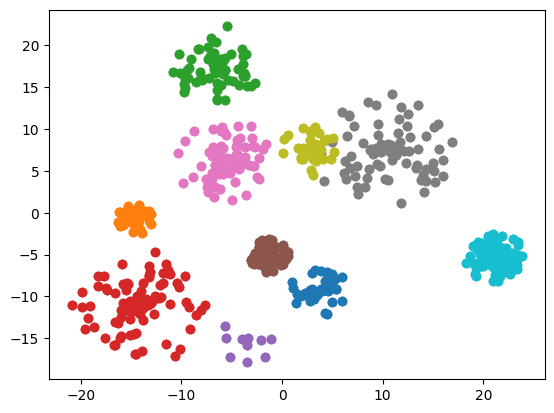

In [69]:
pca=PCA(n_components=2)
new_dataset=pca.fit_transform(dataset)

for i in range(10):
    plt.scatter(new_dataset[types==i,0],new_dataset[types==i,1])

getting_insight(new_dataset)

[6.88103234 5.25640706]


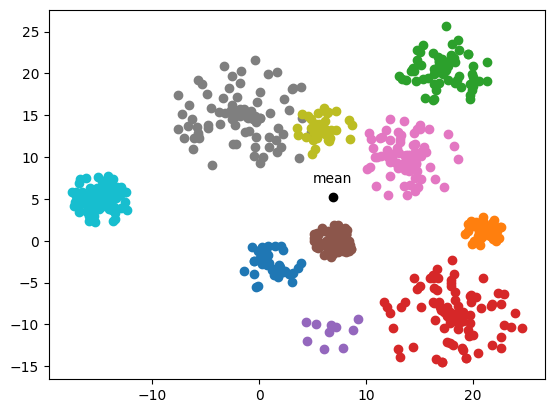

In [70]:
for i in range(10):
    plt.scatter(dataset[types==i,0],dataset[types==i,1])
    
m=np.mean(dataset,axis=0)

plt.scatter(m[0], m[1], color='k')
plt.annotate('mean', (m[0], m[1]), textcoords="offset points", xytext=(0,10), ha='center')

print(m)

In [44]:
for i in range(2):
    print(i)

0
1


In [71]:
# principal component 1, x-y axis
print(pca.components_[0,0])
print(pca.components_[0,1])
# principal component 2, x-y axis
print(pca.components_[1,0])
print(pca.components_[1,1])

-0.9722449538818478
0.23396527445602583
0.23396527445602583
0.9722449538818478


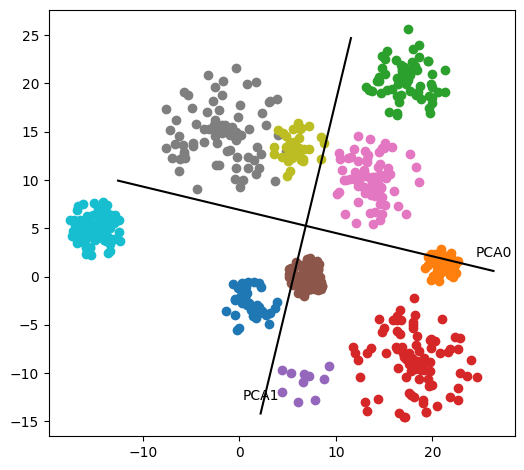

In [72]:
for i in range(10):
    plt.scatter(dataset[types==i,0],dataset[types==i,1])

for i in range(2):
    scale=20
    x0 = m[0]-scale*pca.components_[i,0]
    x1 = m[0]+scale*pca.components_[i,0]
    y0 = m[1]-scale*pca.components_[i,1]
    y1 = m[1]+scale*pca.components_[i,1]
    plt.plot([x0, x1],
             [y0, y1],'k') # x0, x1, y0, y1 of PCA(i)
    plt.annotate(f'PCA{i}', (x0, y0), textcoords="offset points", xytext=(0,10), ha='center')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [16]:
pca.components_

array([[-0.97546047,  0.22017462],
       [ 0.22017462,  0.97546047]])

### Q4c

Suppose $a=(-15,5)$ and $b=(15,10)$. 

Use `plt.scatter` to plot them as two black dots after PCA on the PCA-transformed space. 

Also plot all the PCA-transformed data on the same graph.


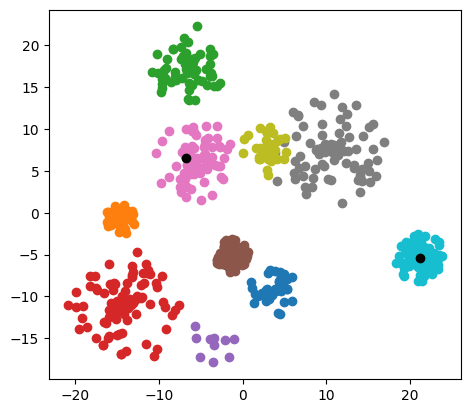

In [73]:
## answer 4c

for i in range(10):
    plt.scatter(new_dataset[types==i,0],new_dataset[types==i,1])
A=np.array([[-15,5],[15,10]])
new_A=pca.transform(A)
plt.gca().set_aspect('equal', adjustable='box')
for i in range(2):
    plt.scatter(new_A[i,0],new_A[i,1],color='k')
